In [1]:
#Importando os repositorios

import matplotlib.pyplot as plt
import pandas as pd
low_memory=False
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [2]:
#Declarando parametros antes de inserir a base
elei2020 = pd.read_csv('perfil_eleitorado_ATUAL.csv', delimiter = ';', encoding='iso-8859-1', usecols=['SG_UF','CD_GRAU_ESCOLARIDADE', 'QT_ELEITORES_PERFIL'])
elei2018 = pd.read_csv('perfil_eleitorado_2018.csv', delimiter = ';', encoding='iso-8859-1', usecols=['SG_UF','CD_GRAU_ESCOLARIDADE', 'QT_ELEITORES_PERFIL'])

In [3]:
#Renomeando colunas para melhor visualização
elei2020.rename(columns={'SG_UF': 'ESTADO', 'CD_GRAU_ESCOLARIDADE': 'ANALFABETO', 'QT_ELEITORES_PERFIL' : 'ELEITORES'},inplace=True)
elei2018.rename(columns={'SG_UF': 'ESTADO', 'CD_GRAU_ESCOLARIDADE': 'ANALFABETO','QT_ELEITORES_PERFIL' : 'ELEITORES'},inplace=True)

In [4]:
elei2020.shape

(4306904, 3)

In [5]:
elei2018.shape

(4181293, 3)

In [6]:
#Tratando o dado de 2020
total2020 = elei2020.query('ANALFABETO == 1')['ESTADO'].count()
f'Total de eleitorados analfabetos em 2020: {total2020}'

'Total de eleitorados analfabetos em 2020: 513875'

In [7]:
#Tratando o dado de 2018
total2018 = elei2018.query('ANALFABETO == 1')['ESTADO'].count()
f'Total de eleitorados analfabetos em 2018: {total2018}'

'Total de eleitorados analfabetos em 2018: 501569'

In [14]:
elei2020.query('ANALFABETO == 1')[['ESTADO','ELEITORES']].sort_values(by='ELEITORES').head(10)

,ESTADO,ELEITORES
1953088,PR,1
1907344,PR,1
1907367,PR,1
1907447,MG,1
1907486,MG,1
1907558,MG,1
1907594,MG,1
1907624,MG,1
1907686,PB,1
1907702,PB,1


In [10]:
elei2018.query('ANALFABETO == 1')[['ESTADO','ELEITORES']].sort_values(by='ELEITORES').head(10)

,ESTADO,ELEITORES
6,TO,1
1958080,PR,1
1958098,MG,1
1958109,MG,1
1958136,MG,1
1958198,MG,1
1958230,MG,1
1958237,MG,1
1958308,PE,1
1958341,PE,1


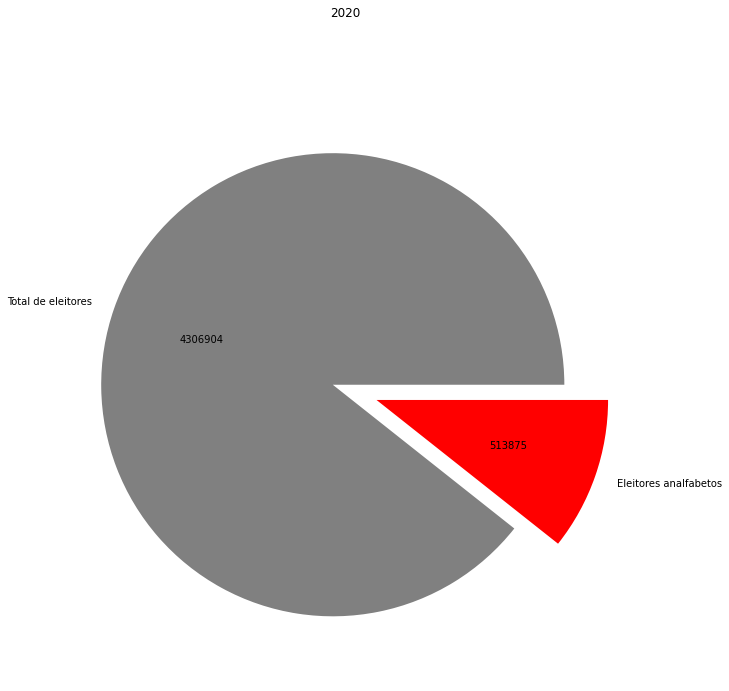

In [19]:
str1=['Total de eleitores','Eleitores analfabetos']
val = [4306904,513875]
total = sum(val)
fig=plt.subplots(figsize=(10,11))
explode = (0.1, 0.1)
plt.pie(val,explode = explode , labels = str1, colors=['grey', 'red'], autopct=lambda p:'{:.0f}'.format(p * total / 100))
plt.axis('equal')
plt.suptitle('2020')
plt.show()

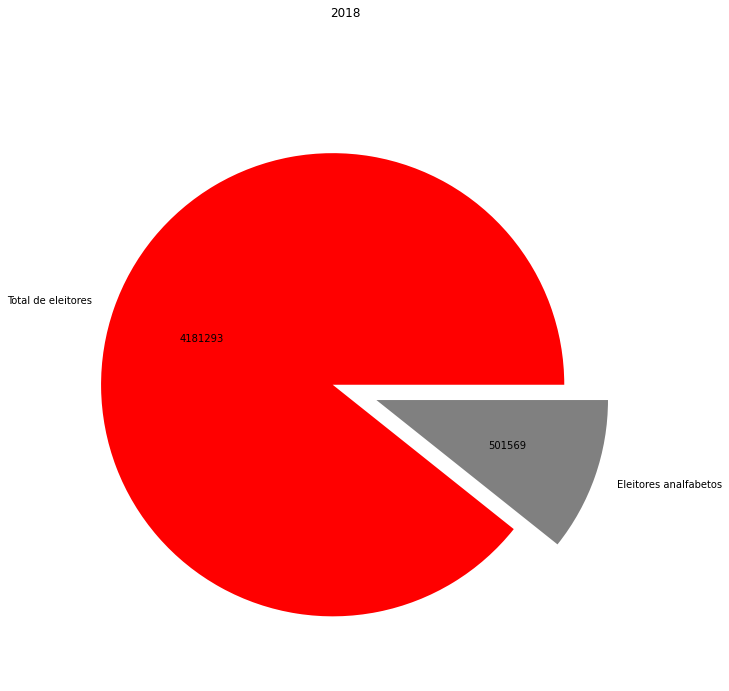

In [21]:
str1=['Total de eleitores','Eleitores analfabetos']
val = [4181293,501569]
total = sum(val)
fig=plt.subplots(figsize=(10,11))
explode = (0.1, 0.1)
plt.pie(val,explode = explode , labels = str1, colors=['red', 'grey'], autopct=lambda p:'{:.0f}'.format(p * total / 100))
plt.axis('equal')
plt.suptitle('2018')
plt.show()

<ipython-input-26-0fd57a4a3f69>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ranking2020 = elei2020.groupby("ESTADO")["ELEITORES","ANALFABETO"].size().sort_values(ascending=True)
<ipython-input-26-0fd57a4a3f69>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ranking2018 = elei2018.groupby("ESTADO")["ELEITORES","ANALFABETO"].size().sort_values(ascending=True)
<ipython-input-26-0fd57a4a3f69>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  elei2020.groupby('ESTADO')["ELEITORES","ANALFABETO"].size().sort_values().tail(26).plot(kind='barh', figsize=(8, 10), color='#58b478', zorder=5, width=0.85, alpha=0.5)
<ipython-input-26-0fd57a4a3f69>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, us

Text(0.5, 1.0, 'Comparação de candidaturas canceladas nos estados brasileiros em 2016 e 2020.')

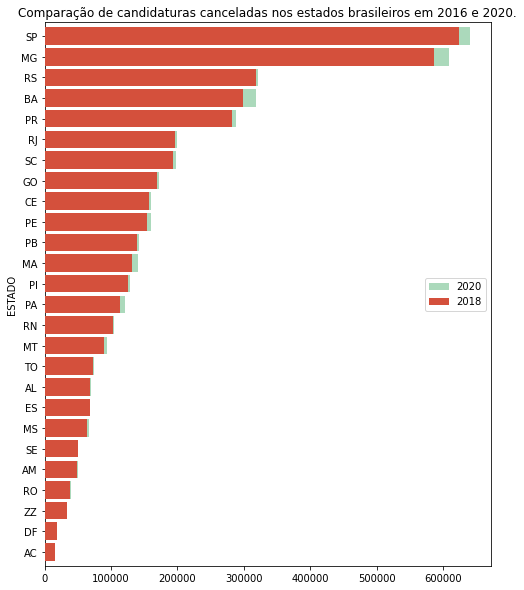

In [26]:
ranking2020 = elei2020.groupby("ESTADO")["ELEITORES","ANALFABETO"].size().sort_values(ascending=False)
ranking2018 = elei2018.groupby("ESTADO")["ELEITORES","ANALFABETO"].size().sort_values(ascending=False)
elei2020.groupby('ESTADO')["ELEITORES","ANALFABETO"].size().sort_values().tail(26).plot(kind='barh', figsize=(8, 10), color='#58b478', zorder=5, width=0.85, alpha=0.5)
elei2018.groupby('ESTADO')["ELEITORES","ANALFABETO"].size().sort_values().tail(26).plot(kind='barh', figsize=(8, 10), color='#d4503c', zorder=5, width=0.85, alpha=1)
plt.legend(["2020", "2018"], loc='right')
plt.title("Comparação de candidaturas canceladas nos estados brasileiros em 2016 e 2020.")